<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/poly_sin_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 汎化性（交差確認法によるモデル選択）

サイン関数の多項式回帰

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def y(x, W, M):
    Y = np.array([W[i] * (x ** i) for i in range(M+1)])
    return Y.sum()

#(1.2),(1.122),(1.123)
def E(x, t, M):
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x**(i+j)).sum()

    T = np.array([((x**i)*t).sum() for i in range(M+1)])
    return  np.linalg.solve(A, T)

データの生成（20サンプル）

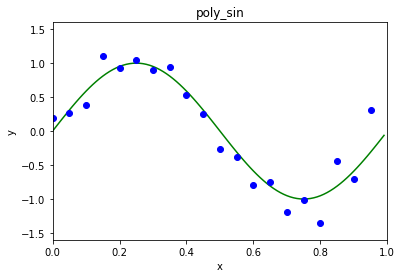

In [7]:
#Sine curve
x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)

##Training Data
N=20
x_train = np.arange(0, 1, 1.0/N)

#Set "small level of random noise having a Gaussian distribution"
loc = 0
scale = 0.3
y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,N)

plt.plot(x_real, y_real, 'g-')
plt.plot(x_train, y_train, 'bo') 
plt.xlim(0.0, 1.0)
plt.ylim(-1.6, 1.6)
plt.title("poly_sin")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('poly_sin_cv20.eps')
plt.show()
plt.close()

多項式回帰の当てはめ（モデル選択）

[ 0  1  3  5  7  8  9 10 12 13 14 15 16 17 18 19] [ 2  4  6 11]
[0.   0.05 0.15 0.25 0.35 0.4  0.45 0.5  0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.1978674   0.26210475  1.10180011  1.04248591  0.94604318  0.52507941
  0.24726785 -0.26766275 -0.79348315 -0.75000524 -1.19278247 -1.00764717
 -1.35887556 -0.44002674 -0.7085363   0.31551534]
W
 [-0.11755346]


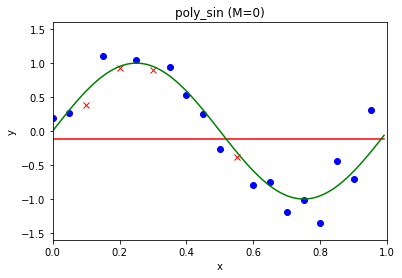

MSE= 0.6086092135997444
[ 0  1  2  3  4  5  6  7  8 10 11 12 16 17 18 19] [ 9 13 14 15]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.5  0.55 0.6  0.8  0.85
 0.9  0.95]
[ 0.1978674   0.26210475  0.3849264   1.10180011  0.92200324  1.04248591
  0.89625044  0.94604318  0.52507941 -0.26766275 -0.388615   -0.79348315
 -1.35887556 -0.44002674 -0.7085363   0.31551534]
W
 [0.16480479]


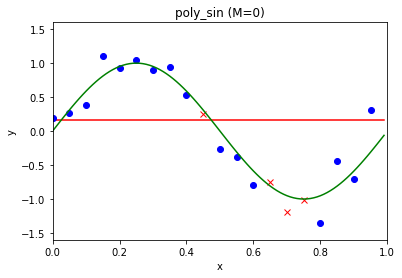

MSE= 1.0153410856293532
[ 0  1  2  3  4  6  8  9 10 11 12 13 14 15 16 17] [ 5  7 18 19]
[0.   0.05 0.1  0.15 0.2  0.3  0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.85]
[ 0.1978674   0.26210475  0.3849264   1.10180011  0.92200324  0.89625044
  0.52507941  0.24726785 -0.26766275 -0.388615   -0.79348315 -0.75000524
 -1.19278247 -1.00764717 -1.35887556 -0.44002674]
W
 [-0.1038624]


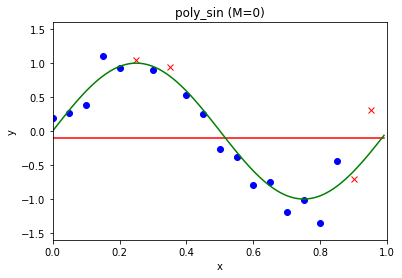

MSE= 0.7394811008994959
[ 0  1  2  3  4  5  6  7  9 11 13 14 15 16 18 19] [ 8 10 12 17]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.45 0.55 0.65 0.7  0.75 0.8
 0.9  0.95]
[ 0.1978674   0.26210475  0.3849264   1.10180011  0.92200324  1.04248591
  0.89625044  0.94604318  0.24726785 -0.388615   -0.75000524 -1.19278247
 -1.00764717 -1.35887556 -0.7085363   0.31551534]
W
 [0.05686268]


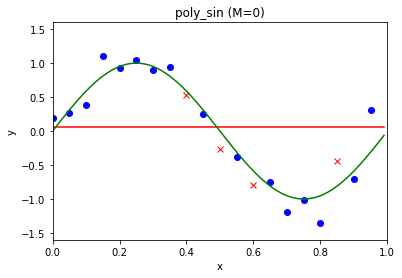

MSE= 0.32363269400683714
[ 2  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19] [ 0  1  3 16]
[0.1  0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.85
 0.9  0.95]
[ 0.3849264   0.92200324  1.04248591  0.89625044  0.94604318  0.52507941
  0.24726785 -0.26766275 -0.388615   -0.79348315 -0.75000524 -1.19278247
 -1.00764717 -0.44002674 -0.7085363   0.31551534]
W
 [-0.01682419]


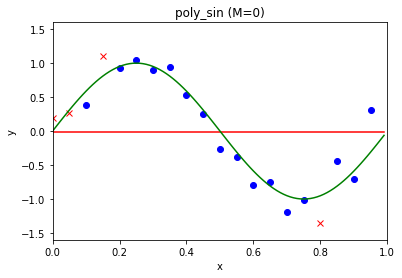

MSE= 0.7940790094267147
CV_MSE[0]=0.696229
[ 0  1  2  3  4  6  7  8  9 10 12 13 15 16 17 18] [ 5 11 14 19]
[0.   0.05 0.1  0.15 0.2  0.3  0.35 0.4  0.45 0.5  0.6  0.65 0.75 0.8
 0.85 0.9 ]
[ 0.1978674   0.26210475  0.3849264   1.10180011  0.92200324  0.89625044
  0.94604318  0.52507941  0.24726785 -0.26766275 -0.79348315 -0.75000524
 -1.00764717 -1.35887556 -0.44002674 -0.7085363 ]
W
 [ 0.91675934 -2.05830406]


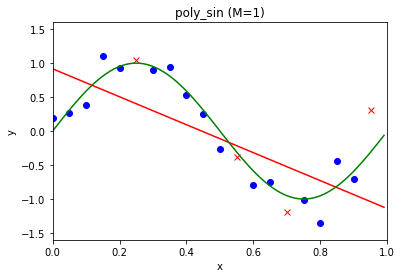

MSE= 0.6802323665811841
[ 2  3  4  5  7  8  9 11 12 13 14 15 16 17 18 19] [ 0  1  6 10]
[0.1  0.15 0.2  0.25 0.35 0.4  0.45 0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.3849264   1.10180011  0.92200324  1.04248591  0.94604318  0.52507941
  0.24726785 -0.388615   -0.79348315 -0.75000524 -1.19278247 -1.00764717
 -1.35887556 -0.44002674 -0.7085363   0.31551534]
W
 [ 1.16308622 -2.28488205]


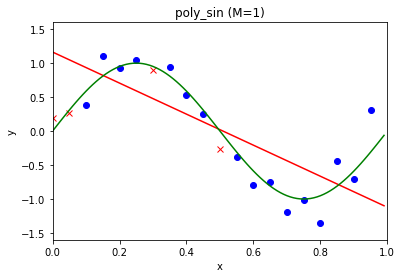

MSE= 0.4522436531289202
[ 0  1  2  4  5  6  8 10 11 12 14 15 16 17 18 19] [ 3  7  9 13]
[0.   0.05 0.1  0.2  0.25 0.3  0.4  0.5  0.55 0.6  0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.1978674   0.26210475  0.3849264   0.92200324  1.04248591  0.89625044
  0.52507941 -0.26766275 -0.388615   -0.79348315 -1.19278247 -1.00764717
 -1.35887556 -0.44002674 -0.7085363   0.31551534]
W
 [ 0.70085879 -1.62343505]


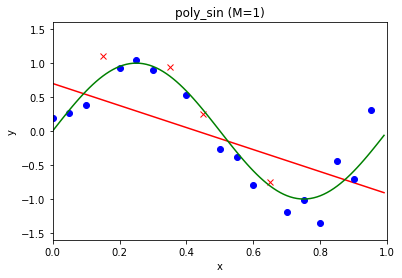

MSE= 0.3275375479988572
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 16 19] [ 4 15 17 18]
[0.   0.05 0.1  0.15 0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.8  0.95]
[ 0.1978674   0.26210475  0.3849264   1.10180011  1.04248591  0.89625044
  0.94604318  0.52507941  0.24726785 -0.26766275 -0.388615   -0.79348315
 -0.75000524 -1.19278247 -1.35887556  0.31551534]
W
 [ 0.82360177 -1.76613407]


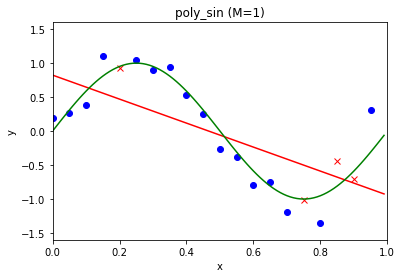

MSE= 0.1301000758799309
[ 0  1  3  4  5  6  7  9 10 11 13 14 15 17 18 19] [ 2  8 12 16]
[0.   0.05 0.15 0.2  0.25 0.3  0.35 0.45 0.5  0.55 0.65 0.7  0.75 0.85
 0.9  0.95]
[ 0.1978674   0.26210475  1.10180011  0.92200324  1.04248591  0.89625044
  0.94604318  0.24726785 -0.26766275 -0.388615   -0.75000524 -1.19278247
 -1.00764717 -0.44002674 -0.7085363   0.31551534]
W
 [ 0.87766479 -1.69297027]


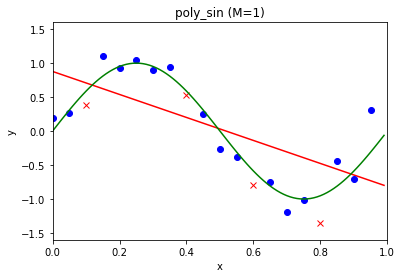

MSE= 0.3544247742874459
CV_MSE[1]=0.388908
[ 0  2  3  5  6  7  8  9 10 11 12 13 14 15 17 18] [ 1  4 16 19]
[0.   0.1  0.15 0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.85 0.9 ]
[ 0.1978674   0.3849264   1.10180011  1.04248591  0.89625044  0.94604318
  0.52507941  0.24726785 -0.26766275 -0.388615   -0.79348315 -0.75000524
 -1.19278247 -1.00764717 -0.44002674 -0.7085363 ]
W
 [ 0.81472033 -0.76327269 -1.63791246]


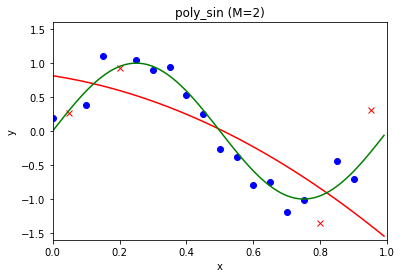

MSE= 0.8838350327676103
[ 0  1  3  4  5  6  9 10 11 13 14 15 16 17 18 19] [ 2  7  8 12]
[0.   0.05 0.15 0.2  0.25 0.3  0.45 0.5  0.55 0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.1978674   0.26210475  1.10180011  0.92200324  1.04248591  0.89625044
  0.24726785 -0.26766275 -0.388615   -0.75000524 -1.19278247 -1.00764717
 -1.35887556 -0.44002674 -0.7085363   0.31551534]
W
 [ 0.92703991 -2.43899435  0.66499047]


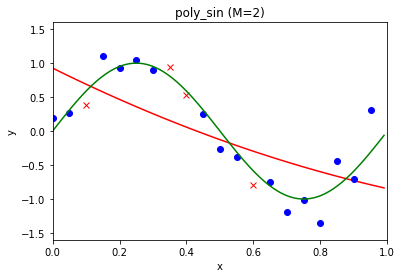

MSE= 0.295942691276884
[ 0  1  2  4  5  6  7  8  9 10 12 13 14 15 16 19] [ 3 11 17 18]
[0.   0.05 0.1  0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.6  0.65 0.7  0.75
 0.8  0.95]
[ 0.1978674   0.26210475  0.3849264   0.92200324  1.04248591  0.89625044
  0.94604318  0.52507941  0.24726785 -0.26766275 -0.79348315 -0.75000524
 -1.19278247 -1.00764717 -1.35887556  0.31551534]
W
 [ 0.74706047 -1.24653037 -0.64756014]


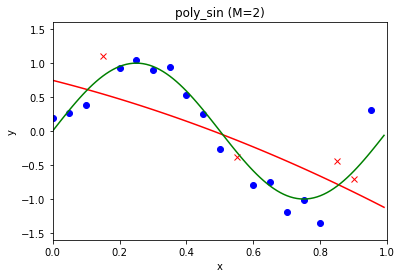

MSE= 0.1315754315337032
[ 0  1  2  3  4  6  7  8 11 12 13 15 16 17 18 19] [ 5  9 10 14]
[0.   0.05 0.1  0.15 0.2  0.3  0.35 0.4  0.55 0.6  0.65 0.75 0.8  0.85
 0.9  0.95]
[ 0.1978674   0.26210475  0.3849264   1.10180011  0.92200324  0.89625044
  0.94604318  0.52507941 -0.388615   -0.79348315 -0.75000524 -1.00764717
 -1.35887556 -0.44002674 -0.7085363   0.31551534]
W
 [ 0.77685228 -1.55624117 -0.09628674]


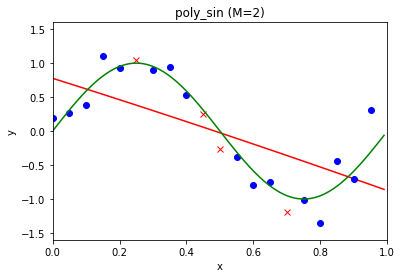

MSE= 0.3063690668204603
[ 1  2  3  4  5  7  8  9 10 11 12 14 16 17 18 19] [ 0  6 13 15]
[0.05 0.1  0.15 0.2  0.25 0.35 0.4  0.45 0.5  0.55 0.6  0.7  0.8  0.85
 0.9  0.95]
[ 0.26210475  0.3849264   1.10180011  0.92200324  1.04248591  0.94604318
  0.52507941  0.24726785 -0.26766275 -0.388615   -0.79348315 -1.19278247
 -1.35887556 -0.44002674 -0.7085363   0.31551534]
W
 [ 1.17386871 -3.18097     1.2993943 ]


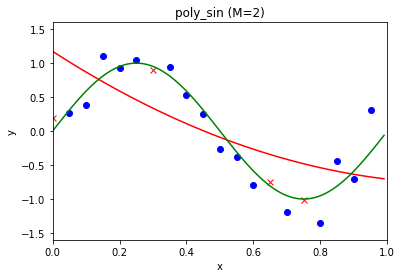

MSE= 0.42687525836349155
CV_MSE[2]=0.408919
[ 0  1  2  4  6  7  8  9 11 12 13 14 15 16 17 19] [ 3  5 10 18]
[0.   0.05 0.1  0.2  0.3  0.35 0.4  0.45 0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.95]
[ 0.1978674   0.26210475  0.3849264   0.92200324  0.89625044  0.94604318
  0.52507941  0.24726785 -0.388615   -0.79348315 -0.75000524 -1.19278247
 -1.00764717 -1.35887556 -0.44002674  0.31551534]
W
 [ -0.15703518  12.95781222 -40.02380956  28.25190095]


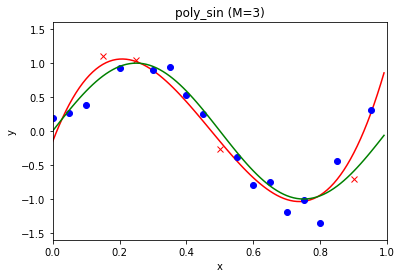

MSE= 0.04503441693917469
[ 0  2  3  5  6  7  8  9 10 11 13 14 15 16 18 19] [ 1  4 12 17]
[0.   0.1  0.15 0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.65 0.7  0.75 0.8
 0.9  0.95]
[ 0.1978674   0.3849264   1.10180011  1.04248591  0.89625044  0.94604318
  0.52507941  0.24726785 -0.26766275 -0.388615   -0.75000524 -1.19278247
 -1.00764717 -1.35887556 -0.7085363   0.31551534]
W
 [ -0.06489941  12.85626624 -40.06362267  28.05032861]


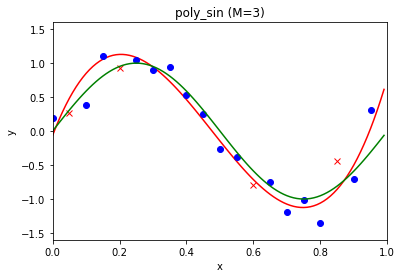

MSE= 0.06756104847262039
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 16 17 18] [ 8 14 15 19]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.45 0.5  0.55 0.6  0.65 0.8
 0.85 0.9 ]
[ 0.1978674   0.26210475  0.3849264   1.10180011  0.92200324  1.04248591
  0.89625044  0.94604318  0.24726785 -0.26766275 -0.388615   -0.79348315
 -0.75000524 -1.35887556 -0.44002674 -0.7085363 ]
W
 [ -0.07799369  11.726727   -36.05451403  24.89294987]


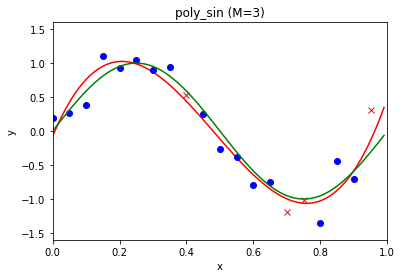

MSE= 0.06274572742640659
[ 0  1  3  4  5  6  8 10 11 12 14 15 16 17 18 19] [ 2  7  9 13]
[0.   0.05 0.15 0.2  0.25 0.3  0.4  0.5  0.55 0.6  0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.1978674   0.26210475  1.10180011  0.92200324  1.04248591  0.89625044
  0.52507941 -0.26766275 -0.388615   -0.79348315 -1.19278247 -1.00764717
 -1.35887556 -0.44002674 -0.7085363   0.31551534]
W
 [-7.30117553e-03  1.21812654e+01 -3.91870529e+01  2.79504240e+01]


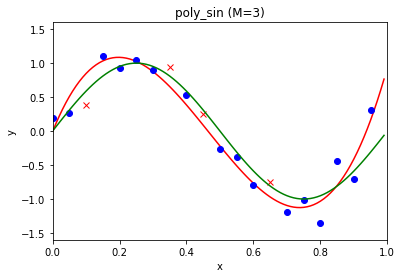

MSE= 0.09328862524994876
[ 1  2  3  4  5  7  8  9 10 12 13 14 15 17 18 19] [ 0  6 11 16]
[0.05 0.1  0.15 0.2  0.25 0.35 0.4  0.45 0.5  0.6  0.65 0.7  0.75 0.85
 0.9  0.95]
[ 0.26210475  0.3849264   1.10180011  0.92200324  1.04248591  0.94604318
  0.52507941  0.24726785 -0.26766275 -0.79348315 -0.75000524 -1.19278247
 -1.00764717 -0.44002674 -0.7085363   0.31551534]
W
 [ -0.52080433  15.65751979 -45.1848223   31.0920629 ]


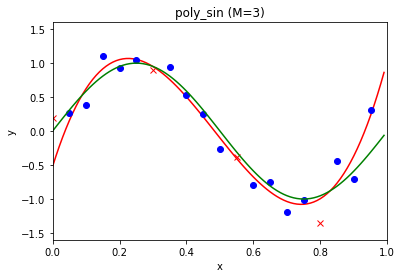

MSE= 0.16318482926278466
CV_MSE[3]=0.086363
[ 0  1  2  4  5  6  7  8 10 11 12 13 14 15 17 18] [ 3  9 16 19]
[0.   0.05 0.1  0.2  0.25 0.3  0.35 0.4  0.5  0.55 0.6  0.65 0.7  0.75
 0.85 0.9 ]
[ 0.1978674   0.26210475  0.3849264   0.92200324  1.04248591  0.89625044
  0.94604318  0.52507941 -0.26766275 -0.388615   -0.79348315 -0.75000524
 -1.19278247 -1.00764717 -0.44002674 -0.7085363 ]
W
 [ 8.03220518e-04  8.52942016e+00 -1.92520913e+01 -4.04980888e+00
  1.59169440e+01]


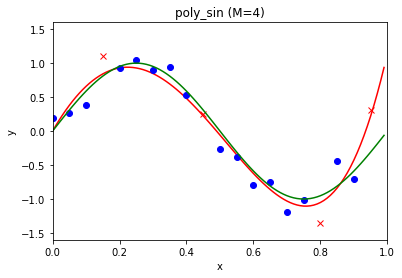

MSE= 0.04302422294133116
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 16 19] [ 1 15 17 18]
[0.   0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.8  0.95]
[ 0.1978674   0.3849264   1.10180011  0.92200324  1.04248591  0.89625044
  0.94604318  0.52507941  0.24726785 -0.26766275 -0.388615   -0.79348315
 -0.75000524 -1.19278247 -1.35887556  0.31551534]
W
 [  0.12435338   6.72786851  -8.48054834 -25.73783028  28.86559487]


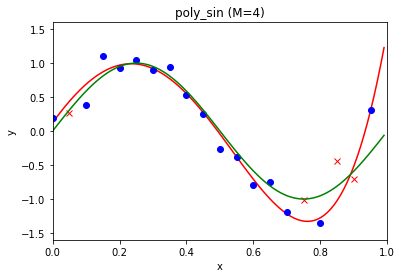

MSE= 0.1270212362847563
[ 1  2  3  6  7  8  9 11 12 13 14 15 16 17 18 19] [ 0  4  5 10]
[0.05 0.1  0.15 0.3  0.35 0.4  0.45 0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.26210475  0.3849264   1.10180011  0.89625044  0.94604318  0.52507941
  0.24726785 -0.388615   -0.79348315 -0.75000524 -1.19278247 -1.00764717
 -1.35887556 -0.44002674 -0.7085363   0.31551534]
W
 [ -0.47237244  14.78830572 -39.73315395  20.66044144   5.89901239]


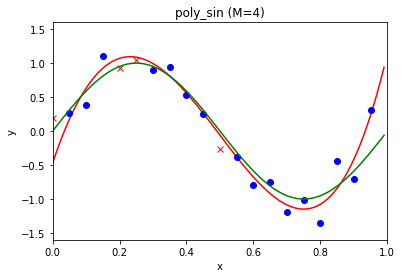

MSE= 0.12908621413327806
[ 0  1  3  4  5  6  7  9 10 11 14 15 16 17 18 19] [ 2  8 12 13]
[0.   0.05 0.15 0.2  0.25 0.3  0.35 0.45 0.5  0.55 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.1978674   0.26210475  1.10180011  0.92200324  1.04248591  0.89625044
  0.94604318  0.24726785 -0.26766275 -0.388615   -1.19278247 -1.00764717
 -1.35887556 -0.44002674 -0.7085363   0.31551534]
W
 [  0.06736037   9.41981358 -23.32249723   0.36534526  14.71696606]


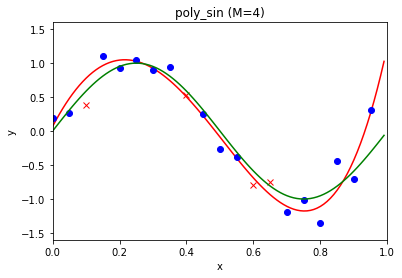

MSE= 0.05003493124706555
[ 0  1  2  3  4  5  8  9 10 12 13 15 16 17 18 19] [ 6  7 11 14]
[0.   0.05 0.1  0.15 0.2  0.25 0.4  0.45 0.5  0.6  0.65 0.75 0.8  0.85
 0.9  0.95]
[ 0.1978674   0.26210475  0.3849264   1.10180011  0.92200324  1.04248591
  0.52507941  0.24726785 -0.26766275 -0.79348315 -0.75000524 -1.00764717
 -1.35887556 -0.44002674 -0.7085363   0.31551534]
W
 [  0.03812506   8.34253693 -18.83017043  -5.00323569  16.66392249]


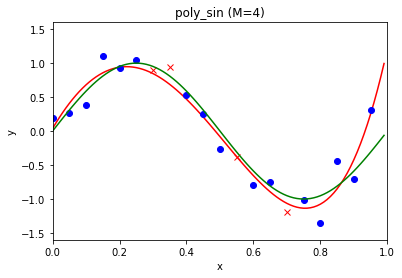

MSE= 0.021602881045788037
CV_MSE[4]=0.074154
[ 0  1  2  4  5  6  7  8 10 13 14 15 16 17 18 19] [ 3  9 11 12]
[0.   0.05 0.1  0.2  0.25 0.3  0.35 0.4  0.5  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.1978674   0.26210475  0.3849264   0.92200324  1.04248591  0.89625044
  0.94604318  0.52507941 -0.26766275 -0.75000524 -1.19278247 -1.00764717
 -1.35887556 -0.44002674 -0.7085363   0.31551534]
W
 [ 1.49520699e-01  1.27769127e+00  3.53872889e+01 -1.51657671e+02
  1.81368484e+02 -6.56631269e+01]


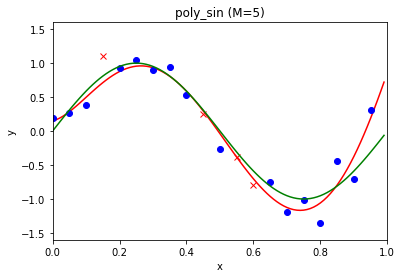

MSE= 0.040559379716473574
[ 0  1  3  4  6  7  8  9 11 12 13 14 15 16 17 18] [ 2  5 10 19]
[0.   0.05 0.15 0.2  0.3  0.35 0.4  0.45 0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.9 ]
[ 0.1978674   0.26210475  1.10180011  0.92200324  0.89625044  0.94604318
  0.52507941  0.24726785 -0.388615   -0.79348315 -0.75000524 -1.19278247
 -1.00764717 -1.35887556 -0.44002674 -0.7085363 ]
W
 [ 1.50103303e-01  3.92693056e+00  2.37923106e+01 -1.42322426e+02
  1.94171819e+02 -7.99123696e+01]


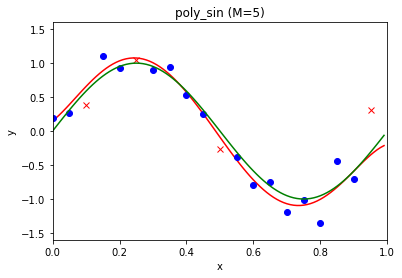

MSE= 0.1377000307322616
[ 1  2  3  5  6  7  8  9 10 11 12 14 15 17 18 19] [ 0  4 13 16]
[0.05 0.1  0.15 0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.7  0.75 0.85
 0.9  0.95]
[ 0.26210475  0.3849264   1.10180011  1.04248591  0.89625044  0.94604318
  0.52507941  0.24726785 -0.26766275 -0.388615   -0.79348315 -1.19278247
 -1.00764717 -0.44002674 -0.7085363   0.31551534]
W
 [ -0.33695699  11.34422127 -14.3557819  -55.55337686 102.26476454
 -42.61284746]


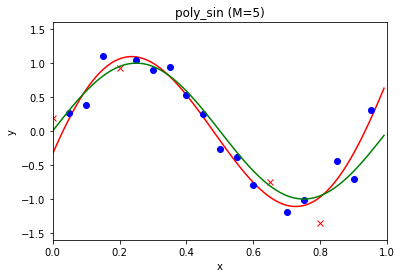

MSE= 0.12720188861315423
[ 0  1  2  3  4  5  9 10 11 12 13 14 15 16 17 19] [ 6  7  8 18]
[0.   0.05 0.1  0.15 0.2  0.25 0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.95]
[ 0.1978674   0.26210475  0.3849264   1.10180011  0.92200324  1.04248591
  0.24726785 -0.26766275 -0.388615   -0.79348315 -0.75000524 -1.19278247
 -1.00764717 -1.35887556 -0.44002674  0.31551534]
W
 [ 1.31498623e-01  2.96655455e+00  2.87397137e+01 -1.47276507e+02
  1.87970968e+02 -7.15811452e+01]


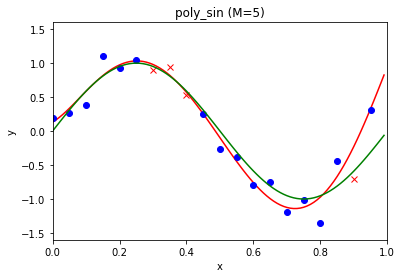

MSE= 0.064833764468868
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 16 18 19] [ 1 14 15 17]
[0.   0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.8
 0.9  0.95]
[ 0.1978674   0.3849264   1.10180011  0.92200324  1.04248591  0.89625044
  0.94604318  0.52507941  0.24726785 -0.26766275 -0.388615   -0.79348315
 -0.75000524 -1.35887556 -0.7085363   0.31551534]
W
 [  0.13740256   6.07962055  -3.90335259 -36.84172526  39.64620977
  -3.69806007]


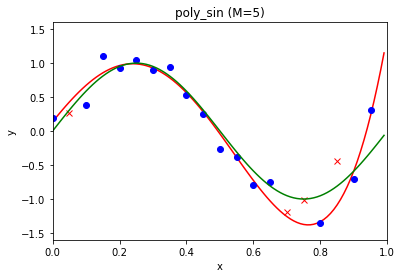

MSE= 0.1457834269488642
CV_MSE[5]=0.103216
[ 0  1  2  3  4  6  7  8  9 10 11 12 14 15 17 19] [ 5 13 16 18]
[0.   0.05 0.1  0.15 0.2  0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.7  0.75
 0.85 0.95]
[ 0.1978674   0.26210475  0.3849264   1.10180011  0.92200324  0.89625044
  0.94604318  0.52507941  0.24726785 -0.26766275 -0.388615   -0.79348315
 -1.19278247 -1.00764717 -0.44002674  0.31551534]
W
 [ 1.64718995e-01  5.69170665e-01  5.30362150e+01 -2.31086976e+02
  3.05497483e+02 -1.33313178e+02  5.72296618e+00]


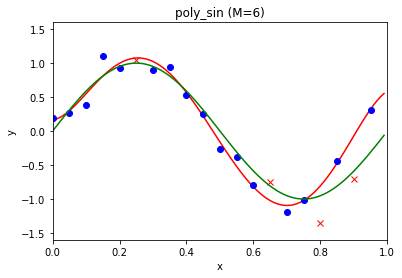

MSE= 0.19813440522975667
[ 0  1  4  5  6  7  8  9 10 11 12 13 15 16 18 19] [ 2  3 14 17]
[0.   0.05 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.75 0.8
 0.9  0.95]
[ 0.1978674   0.26210475  0.92200324  1.04248591  0.89625044  0.94604318
  0.52507941  0.24726785 -0.26766275 -0.388615   -0.79348315 -0.75000524
 -1.00764717 -1.35887556 -0.7085363   0.31551534]
W
 [ 2.33602678e-01 -6.35887002e+00  1.39814989e+02 -6.58305199e+02
  1.27695465e+03 -1.14792562e+03  3.97908923e+02]


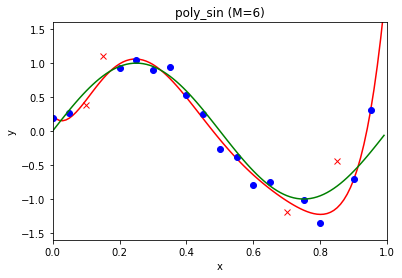

MSE= 0.15420092886600456
[ 0  1  2  3  4  5  6  8  9 11 13 14 16 17 18 19] [ 7 10 12 15]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.4  0.45 0.55 0.65 0.7  0.8  0.85
 0.9  0.95]
[ 0.1978674   0.26210475  0.3849264   1.10180011  0.92200324  1.04248591
  0.89625044  0.52507941  0.24726785 -0.388615   -0.75000524 -1.19278247
 -1.35887556 -0.44002674 -0.7085363   0.31551534]
W
 [ 1.63389797e-01  1.49116327e-01  6.54715216e+01 -3.29649949e+02
  5.99785488e+02 -4.95951456e+02  1.61539061e+02]


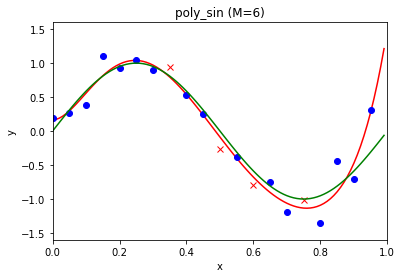

MSE= 0.02105371188925966
[ 0  2  3  4  5  6  7 10 11 12 13 14 15 16 17 18] [ 1  8  9 19]
[0.   0.1  0.15 0.2  0.25 0.3  0.35 0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.9 ]
[ 0.1978674   0.3849264   1.10180011  0.92200324  1.04248591  0.89625044
  0.94604318 -0.26766275 -0.388615   -0.79348315 -0.75000524 -1.19278247
 -1.00764717 -1.35887556 -0.44002674 -0.7085363 ]
W
 [ 1.77160280e-01  7.19852361e-01  5.34579911e+01 -2.48864288e+02
  3.73505398e+02 -2.21727090e+02  4.24651494e+01]


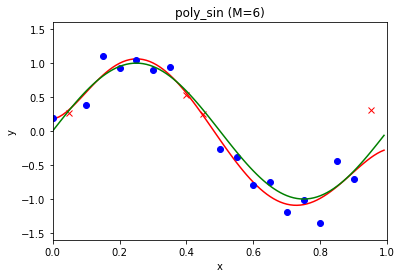

MSE= 0.12666886629298765
[ 1  2  3  5  7  8  9 10 12 13 14 15 16 17 18 19] [ 0  4  6 11]
[0.05 0.1  0.15 0.25 0.35 0.4  0.45 0.5  0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.26210475  0.3849264   1.10180011  1.04248591  0.94604318  0.52507941
  0.24726785 -0.26766275 -0.79348315 -0.75000524 -1.19278247 -1.00764717
 -1.35887556 -0.44002674 -0.7085363   0.31551534]
W
 [ 1.18748006e-01 -2.20631315e+00  1.10191809e+02 -5.41861849e+02
  1.01795700e+03 -8.65421863e+02  2.82809298e+02]


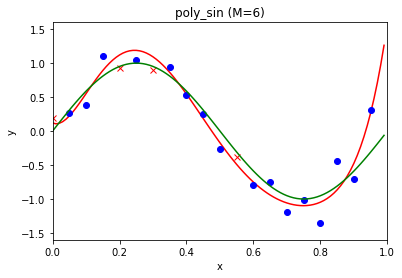

MSE= 0.023656734439790737
CV_MSE[6]=0.104743
[ 0  2  3  4  5  6  7  8  9 10 11 13 14 15 17 18] [ 1 12 16 19]
[0.   0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.65 0.7  0.75
 0.85 0.9 ]
[ 0.1978674   0.3849264   1.10180011  0.92200324  1.04248591  0.89625044
  0.94604318  0.52507941  0.24726785 -0.26766275 -0.388615   -0.75000524
 -1.19278247 -1.00764717 -0.44002674 -0.7085363 ]
W
 [ 1.92561617e-01 -1.13835891e+01  2.63549436e+02 -1.59935281e+03
  4.58010181e+03 -7.05058712e+03  5.60037882e+03 -1.79002797e+03]


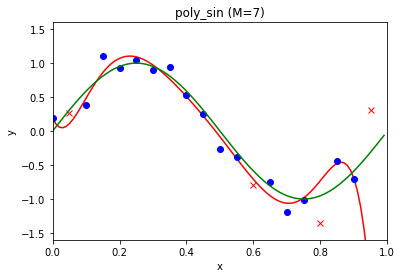

MSE= 1.886154770035187
[ 1  2  5  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 3 4 6]
[0.05 0.1  0.25 0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.26210475  0.3849264   1.04248591  0.94604318  0.52507941  0.24726785
 -0.26766275 -0.388615   -0.79348315 -0.75000524 -1.19278247 -1.00764717
 -1.35887556 -0.44002674 -0.7085363   0.31551534]
W
 [ 6.79161491e-01 -1.66454653e+01  2.04709311e+02 -8.16266651e+02
  1.42712142e+03 -1.18045422e+03  3.92093081e+02 -9.60784132e+00]


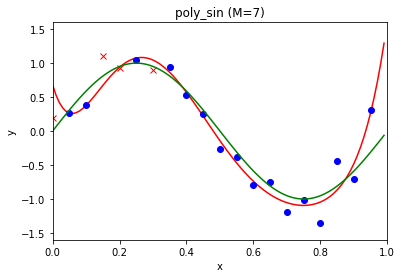

MSE= 0.10998364807661984
[ 0  1  2  3  4  6  7  8 11 12 13 14 15 16 18 19] [ 5  9 10 17]
[0.   0.05 0.1  0.15 0.2  0.3  0.35 0.4  0.55 0.6  0.65 0.7  0.75 0.8
 0.9  0.95]
[ 0.1978674   0.26210475  0.3849264   1.10180011  0.92200324  0.89625044
  0.94604318  0.52507941 -0.388615   -0.79348315 -0.75000524 -1.19278247
 -1.00764717 -1.35887556 -0.7085363   0.31551534]
W
 [ 1.91498309e-01 -3.01980990e+00  1.05943099e+02 -4.98054115e+02
  8.70166585e+02 -5.85042064e+02 -1.62184716e+00  1.13889524e+02]


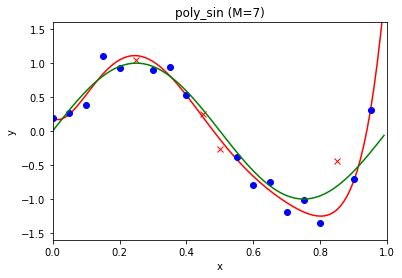

MSE= 0.13449147387125893
[ 0  1  3  4  5  6  7  8  9 10 12 14 16 17 18 19] [ 2 11 13 15]
[0.   0.05 0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.6  0.7  0.8  0.85
 0.9  0.95]
[ 0.1978674   0.26210475  1.10180011  0.92200324  1.04248591  0.89625044
  0.94604318  0.52507941  0.24726785 -0.26766275 -0.79348315 -1.19278247
 -1.35887556 -0.44002674 -0.7085363   0.31551534]
W
 [ 1.60780770e-01  2.72196102e+00  3.74156059e+01 -1.92937795e+02
  2.53973274e+02 -4.90886219e+01 -1.12026711e+02  6.10421752e+01]


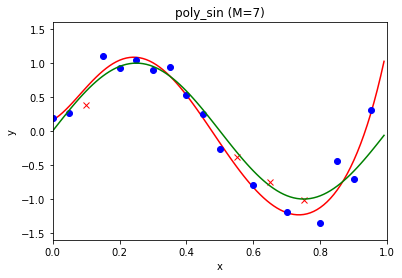

MSE= 0.057558669547112765
[ 0  1  2  3  4  5  6  9 10 11 12 13 15 16 17 19] [ 7  8 14 18]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.45 0.5  0.55 0.6  0.65 0.75 0.8
 0.85 0.95]
[ 0.1978674   0.26210475  0.3849264   1.10180011  0.92200324  1.04248591
  0.89625044  0.24726785 -0.26766275 -0.388615   -0.79348315 -0.75000524
 -1.00764717 -1.35887556 -0.44002674  0.31551534]
W
 [ 2.14957583e-01 -9.34914384e+00  2.37363053e+02 -1.45529125e+03
  4.06406031e+03 -5.95200421e+03  4.42342835e+03 -1.30850065e+03]


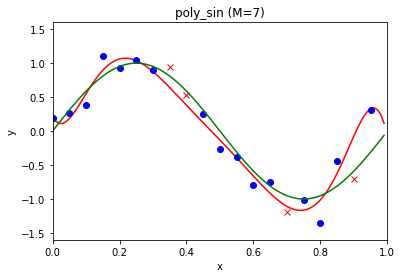

MSE= 0.13185463904330294
CV_MSE[7]=0.464009
[ 0  1  2  3  4  5  7  8  9 10 13 14 15 16 17 19] [ 6 11 12 18]
[0.   0.05 0.1  0.15 0.2  0.25 0.35 0.4  0.45 0.5  0.65 0.7  0.75 0.8
 0.85 0.95]
[ 0.1978674   0.26210475  0.3849264   1.10180011  0.92200324  1.04248591
  0.94604318  0.52507941  0.24726785 -0.26766275 -0.75000524 -1.19278247
 -1.00764717 -1.35887556 -0.44002674  0.31551534]
W
 [ 1.84366043e-01  2.73794283e+00 -5.46006529e+01  1.07393313e+03
 -6.48566221e+03  1.78596279e+04 -2.53950501e+04  1.81829235e+04
 -5.18659684e+03]


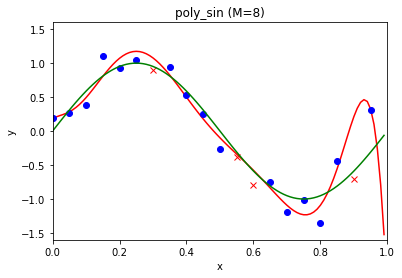

MSE= 0.23273104337576783
[ 1  2  4  5  6  8 10 11 12 13 14 15 16 17 18 19] [0 3 7 9]
[0.05 0.1  0.2  0.25 0.3  0.4  0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.26210475  0.3849264   0.92200324  1.04248591  0.89625044  0.52507941
 -0.26766275 -0.388615   -0.79348315 -0.75000524 -1.19278247 -1.00764717
 -1.35887556 -0.44002674 -0.7085363   0.31551534]
W
 [ 1.22866152e+00 -3.93071760e+01  5.29872829e+02 -2.98447812e+03
  9.06028322e+03 -1.63173866e+04  1.74117392e+04 -1.01414173e+04
  2.48156899e+03]


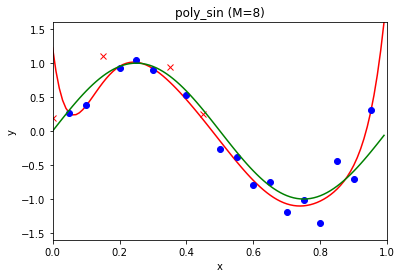

MSE= 0.31801165080017374
[ 0  1  2  3  4  5  6  7  8  9 11 12 15 16 18 19] [10 13 14 17]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.55 0.6  0.75 0.8
 0.9  0.95]
[ 0.1978674   0.26210475  0.3849264   1.10180011  0.92200324  1.04248591
  0.89625044  0.94604318  0.52507941  0.24726785 -0.388615   -0.79348315
 -1.00764717 -1.35887556 -0.7085363   0.31551534]
W
 [ 1.99181974e-01 -6.31745463e+00  1.90627339e+02 -1.28238667e+03
  4.33728971e+03 -8.75357752e+03  1.05223311e+04 -6.88085559e+03
  1.87582008e+03]


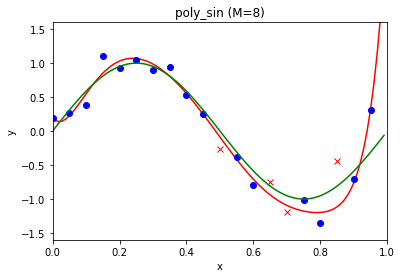

MSE= 0.13307555586875625
[ 0  1  2  3  4  6  7  9 10 11 12 13 14 16 17 18] [ 5  8 15 19]
[0.   0.05 0.1  0.15 0.2  0.3  0.35 0.45 0.5  0.55 0.6  0.65 0.7  0.8
 0.85 0.9 ]
[ 0.1978674   0.26210475  0.3849264   1.10180011  0.92200324  0.89625044
  0.94604318  0.24726785 -0.26766275 -0.388615   -0.79348315 -0.75000524
 -1.19278247 -1.35887556 -0.44002674 -0.7085363 ]
W
 [ 1.84918196e-01  3.58174751e+00 -8.95322996e+01  1.53296283e+03
 -9.14774699e+03  2.57074802e+04 -3.76971308e+04  2.79534979e+04
 -8.27828061e+03]


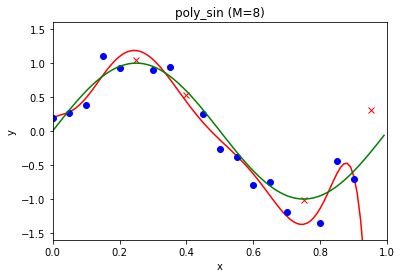

MSE= 4.063184956651462
[ 0  3  5  6  7  8  9 10 11 12 13 14 15 17 18 19] [ 1  2  4 16]
[0.   0.15 0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.85
 0.9  0.95]
[ 0.1978674   1.10180011  1.04248591  0.89625044  0.94604318  0.52507941
  0.24726785 -0.26766275 -0.388615   -0.79348315 -0.75000524 -1.19278247
 -1.00764717 -0.44002674 -0.7085363   0.31551534]
W
 [ 1.98698125e-01 -8.76217226e+00  3.38800785e+02 -2.84210012e+03
  1.14095307e+04 -2.54667033e+04  3.20055641e+04 -2.10973799e+04
  5.66451523e+03]


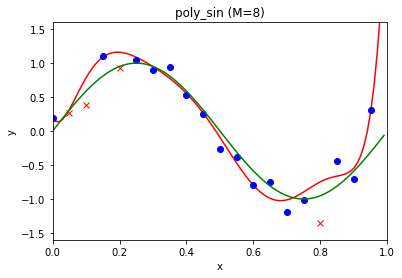

MSE= 0.14872998845664812
CV_MSE[8]=0.979147
[ 0  2  4  5  6  7  8  9 10 12 13 14 15 17 18 19] [ 1  3 11 16]
[0.   0.1  0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.6  0.65 0.7  0.75 0.85
 0.9  0.95]
[ 0.1978674   0.3849264   0.92200324  1.04248591  0.89625044  0.94604318
  0.52507941  0.24726785 -0.26766275 -0.79348315 -0.75000524 -1.19278247
 -1.00764717 -0.44002674 -0.7085363   0.31551534]
W
 [ 1.96653892e-01  3.64077753e+01 -9.15597957e+02  9.32113307e+03
 -4.77687424e+04  1.38896685e+05 -2.40592665e+05  2.46099480e+05
 -1.37169898e+05  3.21000770e+04]


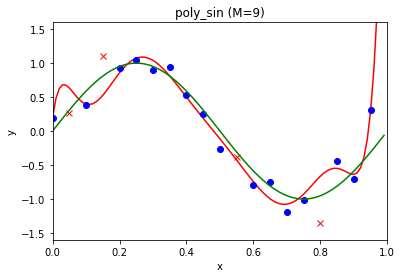

MSE= 0.23874775748646349
[ 0  1  3  4  5  6  7  8  9 10 11 13 14 16 17 19] [ 2 12 15 18]
[0.   0.05 0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.65 0.7  0.8
 0.85 0.95]
[ 0.1978674   0.26210475  1.10180011  0.92200324  1.04248591  0.89625044
  0.94604318  0.52507941  0.24726785 -0.26766275 -0.388615   -0.75000524
 -1.19278247 -1.35887556 -0.44002674  0.31551534]
W
 [ 1.94657382e-01 -2.29555271e+01  8.43719784e+02 -9.23190746e+03
  5.07987568e+04 -1.59934352e+05  2.99136482e+05 -3.28011468e+05
  1.94471330e+05 -4.80642873e+04]


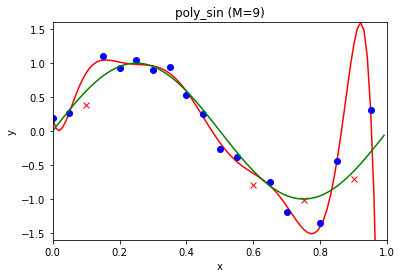

MSE= 1.0984372942269127
[ 1  2  3  4  5  6  8  9 10 11 12 14 15 16 17 18] [ 0  7 13 19]
[0.05 0.1  0.15 0.2  0.25 0.3  0.4  0.45 0.5  0.55 0.6  0.7  0.75 0.8
 0.85 0.9 ]
[ 0.26210475  0.3849264   1.10180011  0.92200324  1.04248591  0.89625044
  0.52507941  0.24726785 -0.26766275 -0.388615   -0.79348315 -1.19278247
 -1.00764717 -1.35887556 -0.44002674 -0.7085363 ]
W
 [ 5.67882542e+00 -2.43161744e+02  3.94866820e+03 -3.12249120e+04
  1.40522090e+05 -3.83959441e+05  6.47361171e+05 -6.57161005e+05
  3.67898257e+05 -8.71912023e+04]


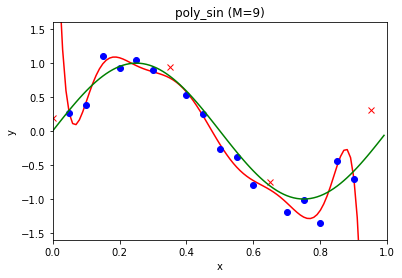

MSE= 27.22219018407045
[ 0  1  2  3  4  6  7 10 11 12 13 14 15 16 18 19] [ 5  8  9 17]
[0.   0.05 0.1  0.15 0.2  0.3  0.35 0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.9  0.95]
[ 0.1978674   0.26210475  0.3849264   1.10180011  0.92200324  0.89625044
  0.94604318 -0.26766275 -0.388615   -0.79348315 -0.75000524 -1.19278247
 -1.00764717 -1.35887556 -0.7085363   0.31551534]
W
 [ 2.10026852e-01 -1.41101544e+01  4.25812065e+02 -3.91972720e+03
  1.91588200e+04 -5.56081786e+04  9.74474698e+04 -1.00627141e+05
  5.62165262e+04 -1.30787724e+04]


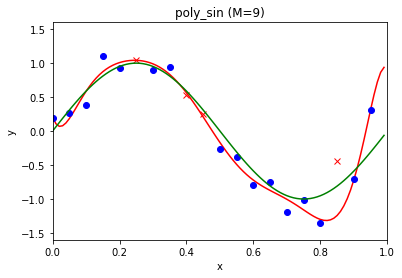

MSE= 0.16146633801182683
[ 0  1  2  3  5  7  8  9 11 12 13 15 16 17 18 19] [ 4  6 10 14]
[0.   0.05 0.1  0.15 0.25 0.35 0.4  0.45 0.55 0.6  0.65 0.75 0.8  0.85
 0.9  0.95]
[ 0.1978674   0.26210475  0.3849264   1.10180011  1.04248591  0.94604318
  0.52507941  0.24726785 -0.388615   -0.79348315 -0.75000524 -1.00764717
 -1.35887556 -0.44002674 -0.7085363   0.31551534]
W
 [ 2.04247350e-01 -5.02274216e+00  1.15776628e+02 -1.56719382e+02
 -2.80090119e+03  1.48782743e+04 -3.38109723e+04  4.06194247e+04
 -2.52130778e+04  6.37611715e+03]


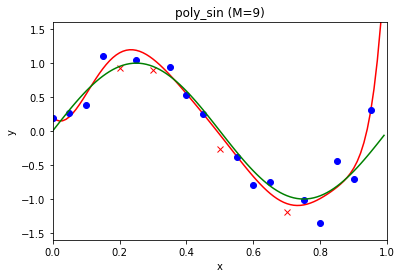

MSE= 0.03494689404685782
CV_MSE[9]=5.751158


In [8]:
from sklearn.model_selection import KFold

search_range = [0,1,2,3,4,5,6,7,8,9]
n_fold = 5

CV_MSE = np.zeros(len(search_range))

for M in search_range:

  kf = KFold(n_splits=n_fold, shuffle=True)
  for train_indx, test_indx in kf.split(x_train):
    print("%s %s" % (train_indx, test_indx))
    x_train_cv = x_train[train_indx]
    y_train_cv = y_train[train_indx]
    x_test_cv = x_train[test_indx]
    y_test_cv = y_train[test_indx]

    print(x_train_cv)
    print(y_train_cv)

    W = E(x_train_cv, y_train_cv, M)
    print('W\n', W)

    y_estimate_cv = [y(x, W, M) for x in x_test_cv]

    y_estimate = [y(x, W, M) for x in x_real]

    plt.plot(x_real, y_estimate, 'r-')
    plt.plot(x_train_cv, y_train_cv, 'bo')
    plt.plot(x_test_cv, y_test_cv, 'rx') 
    plt.plot(x_real, y_real, 'g-')
    plt.xlim(0.0, 1.0)
    plt.ylim(-1.6, 1.6)
    plt.title("poly_sin (M=%s)" % M)
    plt.xlabel('x')
    plt.ylabel('y')
#    plt.savefig('poly_sin_%d.eps' % M)
    plt.show()
    plt.close()


    mse = (np.square(y_test_cv - y_estimate_cv)).mean()
    print('MSE=', mse)

    CV_MSE[M] += mse

  CV_MSE[M]=CV_MSE[M]/n_fold

  print('CV_MSE[%d]=%f'% (M, CV_MSE[M]))



CV_MSE
 [0.69622862 0.38890768 0.4089195  0.08636293 0.0741539  0.1032157
 0.10474293 0.46400864 0.97914664 5.75115769]
The best order of the model is 5


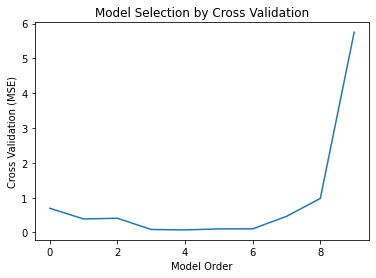

In [9]:
print('CV_MSE\n', CV_MSE)
print('The best order of the model is %d' % (np.argmin(CV_MSE)+1))

plt.plot(CV_MSE)
plt.title("Model Selection by Cross Validation")
plt.xlabel('Model Order')
plt.ylabel('Cross Validation (MSE)')
plt.savefig('poly_sin_cvMSE.eps')
plt.show()
plt.close()
